# Mass-Spring-Damper System Simulation

In this notebook, we will model a mass-spring-damper system and visualize how it behaves when a step force is applied.

We will:
1. Define the system's physical parameters.
2. Create the transfer function that represents the system.
3. Simulate the system's response over time.
4. Plot the system's displacement (output) over time.


In [25]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl


In [26]:
# Defining physical parameters of the mass-spring-damper system
m = 1.0    # mass (kg)
k = 20.0   # spring constant (N/m)
c = 3.0    # damping coefficient (Ns/m)


### Transfer Function of the Mass-Spring-Damper System

The system can be modeled using Newton's second law:

$$ F(t) = m \cdot \ddot{x}(t) + c \cdot \dot{x}(t) + k \cdot x(t) $$

After Laplace transform:

$$ F(s) = m \cdot s^2 X(s) + c \cdot s X(s) + k \cdot X(s) $$

Transfer function:

$$ G(s) = \frac{X(s)}{F(s)} = \frac{1}{m \cdot s^2 + c \cdot s + k} $$

In [27]:
# Transfer Function: G(s) = 1 / (m*s^2 + c*s + k)
numerator = [1]               # Numerator represents the output (displacement)
denominator = [m, c, k]       # Denominator represents the dynamics (mass, damping, spring constant)

# Creating the transfer function of the system
system = ctrl.TransferFunction(numerator, denominator)

# Display the transfer function
system


TransferFunction(array([1]), array([ 1.,  3., 20.]))

### System Behavior

The behavior of the **mass-spring-damper** system is highly influenced by the **damping coefficient** \( c \). The system can exhibit different types of behavior based on the value of \( c \):

1. **Underdamped**:  
   When the damping coefficient is **small**, the system **oscillates** before it settles to its equilibrium position. The oscillations decrease in amplitude over time, but they persist until the system stabilizes.

2. **Critically Damped**:  
   When the damping coefficient is **just right** (often referred to as "critically damped"), the system returns to equilibrium **as quickly as possible without oscillating**. This is the ideal situation for systems where you want fast stabilization without overshooting or oscillations.

3. **Overdamped**:  
   When the damping coefficient is **large**, the system **returns to equilibrium slowly**. There is no oscillation, but the system takes a longer time to reach its steady-state compared to the critically damped case. The higher the damping, the slower the return to equilibrium.

### Poles and Zeros

- **Poles**:  
  Poles are values of \( s \) (in the Laplace domain) that make the denominator of the transfer function equal to zero. The poles directly influence the stability and behavior of the system:
  - **Real poles** (if the system is overdamped) indicate that the system does not oscillate and stabilizes slowly.
  - **Complex conjugate poles** (if the system is underdamped) cause the system to oscillate before settling to equilibrium.
  - The position of the poles determines the **speed** of the system's response: poles with larger negative real parts indicate faster stabilization.

- **Zeros**:  
  Zeros are values of \( s \) that make the numerator of the transfer function equal to zero. For a mass-spring-damper system, the numerator is just 1, so there are no **non-trivial zeros** (i.e., the system has no zeros).

### Simulation of Step Response

By simulating the step response for different damping values \( c \), we can observe how the system behaves under each of these conditions. Specifically:

- **Underdamped** behavior will show **oscillations** due to complex conjugate poles.
- **Critically damped** behavior will exhibit **no oscillations** and the **fastest return** to equilibrium, with real and equal poles.
- **Overdamped** behavior will show **slower return** to equilibrium without oscillations, with real and distinct poles.

### Visualizing Poles and Zeros

The location of the **poles** in the **Laplace domain** gives us insight into the system's stability and response characteristics:
- **Left half-plane poles** indicate a stable system.
- **Right half-plane poles** indicate an unstable system.
- **Complex poles** (for underdamped systems) indicate oscillatory behavior.

This exploration helps us understand how damping affects the system's **speed**, **stability**, and **oscillatory behavior**, as well as how the poles and zeros affect the system dynamics.



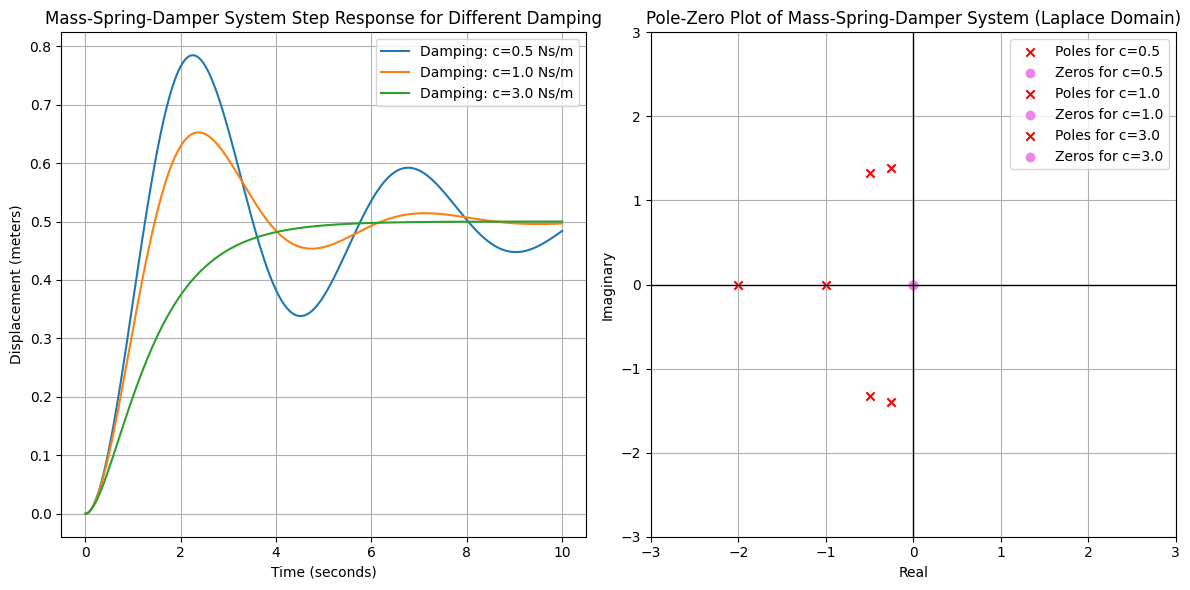

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# System parameters
m = 1  # mass (kg)
k = 2  # spring constant (N/m)
damping_values = [0.5, 1.0, 3.0]  # Underdamped, Critically Damped, Overdamped
time = np.linspace(0, 10, 500)  # Time vector (from 0 to 10 seconds, 500 points)

# Plotting the step response and pole-zero plots for different damping values
plt.figure(figsize=(12, 6))

# Color list for different damping cases
colors = ['blue', 'green', 'red']

# Loop through each damping coefficient
for i, c in enumerate(damping_values):
    # Create transfer function for each damping value
    system = ctrl.TransferFunction([1], [m, c, k])
    
    # Simulate step response
    time_response, response = ctrl.step_response(system, T=time)
    
    # Plot the response in time domain
    plt.subplot(1, 2, 1)
    plt.plot(time_response, response, label=f'Damping: c={c} Ns/m')

    # Plot poles and zeros
    poles = np.roots([m, c, k])  # Poles of the system
    zeros = np.array([0])  # No zeros for the given system (numerator is 1)
    
    # Plot poles and zeros on the complex plane (Laplace domain)
    plt.subplot(1, 2, 2)
    plt.scatter(np.real(poles), np.imag(poles), color=colors[i], marker='x', label=f'Poles for c={c}')
    plt.scatter(np.real(zeros), np.imag(zeros), color='violet', marker='o', label=f'Zeros for c={c}')

# Plotting the time-domain response
plt.subplot(1, 2, 1)
plt.title('Mass-Spring-Damper System Step Response for Different Damping')
plt.xlabel('Time (seconds)')
plt.ylabel('Displacement (meters)')
plt.legend()
plt.grid(True)

# Plotting the pole-zero plot
plt.subplot(1, 2, 2)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Plot of Mass-Spring-Damper System (Laplace Domain)')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


### Conclusion

The transfer function of a mass-spring-damper system is given by:

$$
G(s) = \frac{1}{m \cdot s^2 + c \cdot s + k}
$$

This transfer function remains the same for the given system parameters \( m \), \( c \), and \( k \), but the system's behavior varies depending on the damping coefficient \( c \).

- **Underdamped** systems oscillate before settling.
- **Critically damped** systems return to equilibrium quickly without oscillating.
- **Overdamped** systems return to equilibrium slowly without oscillating.

By changing the damping coefficient, we can control how the system behaves, which is crucial in designing **control systems** to achieve desired performance.
